<a href="https://colab.research.google.com/github/0aras/ml_test_apps/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import numpy as np
import pandas as pd
from torch import nn
import matplotlib.pyplot as plt

In [4]:
device="cuda" if torch.cuda.is_available() else "cpu"


In [18]:
weight=0.3
bias=0.9

start=0
end=1
step=0.01

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

In [31]:
train_split=int(0.8*len(X))

X_train, y_train= X[:train_split], y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

In [32]:
def plot_tahminet(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 tahmin=None):
  plt.figure(figsize=(8,5))
  plt.scatter(train_data,train_labels, c="b",s=4, label="Training data")
  plt.scatter(test_data,test_label,c="y",s=4,label="Test Data")
  if tahmin is not None:
    plt.scatter(test_data,tahmin,c="r",s=4,label="Tahminler")
  plt.legend(prop={"size": 8});


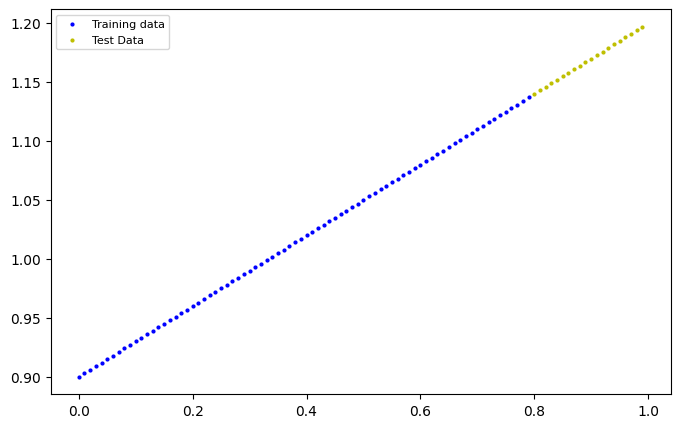

In [33]:
plot_tahminet(X_train, y_train, X_test, y_test)

In [36]:
class LineaRegressionModel3(nn.Module):
  def __init__(self):
   super().__init__()
   self.linear_layer=nn.Linear(in_features=1,
                              out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [37]:
torch.manual_seed(42)
model_3=LineaRegressionModel3()
model_3.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [47]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.001)


In [49]:
epochs=200
for epoch in range(epochs):
  #SET UP TRAIN
  model_3.train()

  #FORWARD PASS
  y_pred=model_3(X_train)

  #LOSS
  loss=loss_fn(y_pred,y_train)

  #OPTIMIZER
  optimizer.zero_grad()

  #BACK
  loss.backward()

  #STEP
  optimizer.step()

  model_3.eval()

  with torch.inference_mode():
    test_pred=model_3(X_test)
    test_loss=loss_fn(test_pred, y_test)
    if epoch%20==0:
      print(f"Epoch.: {epoch}| Loss: {loss}| Test Loss: {test_loss} ")


Epoch.: 0| Loss: 0.009925423189997673| Test Loss: 0.02340395376086235 
Epoch.: 20| Loss: 0.009240338578820229| Test Loss: 0.021770983934402466 
Epoch.: 40| Loss: 0.008555257692933083| Test Loss: 0.020138025283813477 
Epoch.: 60| Loss: 0.007870079949498177| Test Loss: 0.018539423123002052 
Epoch.: 80| Loss: 0.007184995803982019| Test Loss: 0.016906458884477615 
Epoch.: 100| Loss: 0.006499911192804575| Test Loss: 0.015273493714630604 
Epoch.: 120| Loss: 0.005814775824546814| Test Loss: 0.013657731004059315 
Epoch.: 140| Loss: 0.005129595752805471| Test Loss: 0.012059146538376808 
Epoch.: 160| Loss: 0.004444506950676441| Test Loss: 0.010426181368529797 
Epoch.: 180| Loss: 0.0037594251334667206| Test Loss: 0.008793199434876442 


In [50]:
with torch.inference_mode():
  y_preds=model_3(X_test)
y_preds

tensor([[1.1458],
        [1.1490],
        [1.1521],
        [1.1553],
        [1.1584],
        [1.1616],
        [1.1647],
        [1.1679],
        [1.1710],
        [1.1742],
        [1.1773],
        [1.1805],
        [1.1837],
        [1.1868],
        [1.1900],
        [1.1931],
        [1.1963],
        [1.1994],
        [1.2026],
        [1.2057]])

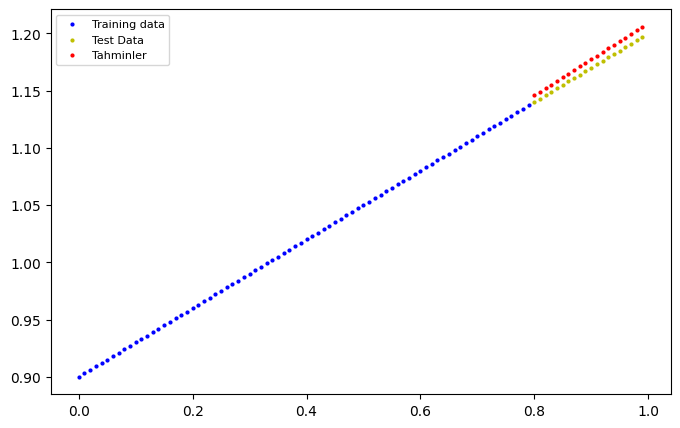

In [51]:
plot_tahminet(tahmin=y_preds,)